In [1]:
import os
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.2.0


In [2]:
#import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

#from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)   

Populating the interactive namespace from numpy and matplotlib


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime



In [4]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [7]:
data=pd.read_csv('EURUSD60.csv')
data.head()


,Date,Time,Open,High,Low,Close,Volume
0,1999.01.04,10:00,1.1801,1.1819,1.1769,1.1789,388
1,1999.01.04,11:00,1.1795,1.1819,1.1780,1.1791,490
2,1999.01.04,12:00,1.1791,1.1803,1.1788,1.1798,278
3,1999.01.04,13:00,1.1797,1.1804,1.1781,1.1782,364
4,1999.01.04,14:00,1.1780,1.1820,1.1775,1.1802,482


In [8]:
data.tail()


,Date,Time,Open,High,Low,Close,Volume
129930,2019.12.12,17:00,1.11249,1.11362,1.11113,1.11171,5186
129931,2019.12.12,18:00,1.11171,1.11214,1.11104,1.11142,3525
129932,2019.12.12,19:00,1.11143,1.11171,1.11080,1.11101,2331
129933,2019.12.12,20:00,1.11101,1.11133,1.11029,1.11100,2431
129934,2019.12.12,21:00,1.11098,1.11131,1.11039,1.11113,3011


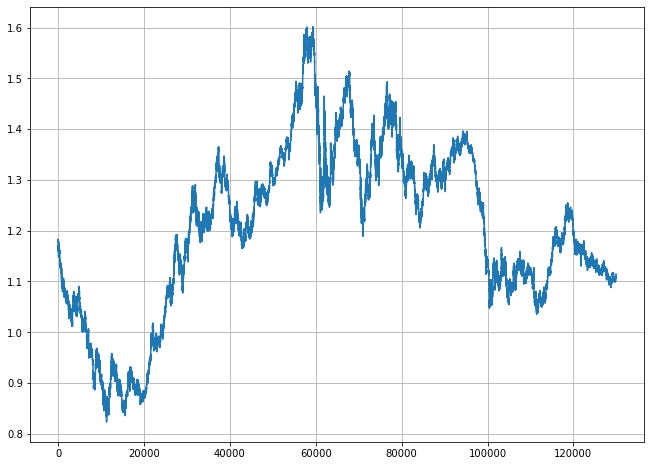

In [9]:
f, ax = plt.subplots(figsize=(11,8))

data['Close'].plot(grid = True)

In [10]:
new_data=data.loc[:,['Open','High','Low','Close']]
new_data.head()


,Open,High,Low,Close
0,1.1801,1.1819,1.1769,1.1789
1,1.1795,1.1819,1.1780,1.1791
2,1.1791,1.1803,1.1788,1.1798
3,1.1797,1.1804,1.1781,1.1782
4,1.1780,1.1820,1.1775,1.1802


#Preprocessing 


In [11]:
X=new_data.iloc[:,:-1].values
y=new_data.iloc[:,-1].values



In [12]:
X.shape

(129935, 3)

In [13]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:,:]=imputer.fit_transform(X[:,:])

In [14]:
y=imputer.fit_transform(y.reshape(-1,1))
imputer2 = SimpleImputer(missing_values=np.nan, strategy='mean')

y=imputer2.fit_transform(y)

In [15]:
#Feature Scaler
from sklearn.preprocessing import StandardScaler
featurescaling=StandardScaler()
X=featurescaling.fit_transform(X)
 

In [16]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,shuffle=False)

In [17]:
n_features=3
n_mins=1

In [18]:
train_X=train_X.reshape(train_X.shape[0],n_mins,n_features)
test_X=test_X.reshape(test_X.shape[0],n_mins,n_features)
print(train_X.shape,test_X.shape)

(103948, 1, 3) (25987, 1, 3)


In [19]:
# Define a simple sequential model
def create_model():
    model = tf.keras.models.Sequential([
    keras.layers.LSTM(200, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
  ])

    model.compile(optimizer='adam',
                loss='mse',
                metrics=['mse'])

    return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               163200    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 188,401
Trainable params: 188,401
Non-trainable params: 0
__________________________________________________

In [20]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
history=model.fit(train_X, 
          train_y,  
          epochs=30,
          validation_split=0.2,
          callbacks=[cp_callback])
  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/30
2599/2599 [==============================] - ETA: 0s - loss: 0.0231 - mse: 0.0231
Epoch 00001: saving model to training_1/cp.ckpt
2599/2599 [==============================] - 27s 10ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 3.0893e-05 - val_mse: 3.0893e-05
Epoch 2/30
2594/2599 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00002: saving model to training_1/cp.ckpt
2599/2599 [==============================] - 30s 11ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.4277e-05 - val_mse: 7.4277e-05
Epoch 3/30
2598/2599 [============================>.] - ETA: 0s - loss: 0.0012 - mse: 0.0012
Epoch 00003: saving model to training_1/cp.ckpt
2599/2599 [==============================] - 27s 10ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 5.7290e-05 - val_mse: 5.7290e-05
Epoch 4/30
2596/2599 [============================>.] - ETA: 0s - loss: 8.3971e-04 - mse: 8.3971e-04
Epoch 00004: saving model to training_1/cp.ckpt
2599/2599 [==================

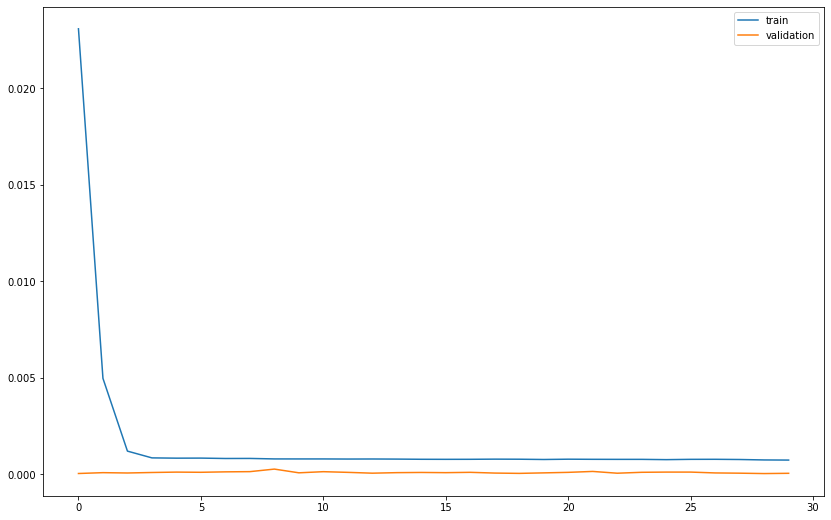

In [26]:
import matplotlib.pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

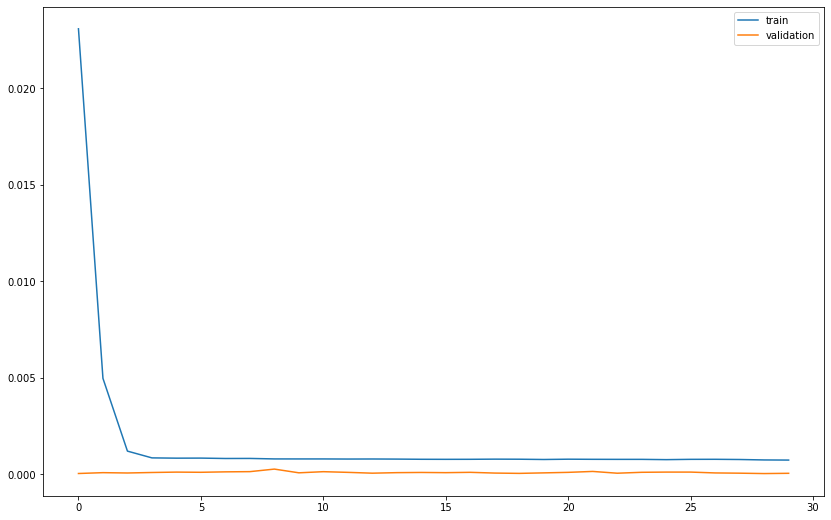

In [22]:
# plot history
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='validation')
plt.legend()
plt.show()

In [23]:

accr = model.evaluate(test_X,test_y)
##print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.1f} %'.format(accr[0],round(accr[1]*100,1)))
accr

813/813 [==============================] - 3s 3ms/step - loss: 1.3782e-04 - mse: 1.3782e-04


[0.00013781647430732846, 0.00013781647430732846]

In [44]:
prediction=model.predict(test_X)
prediction

from sklearn.metrics import mean_squared_error

res=mean_squared_error(test_y, prediction)  
res

0.00013781642356497665

In [45]:
prediction

array([[1.1314312],
       [1.1319696],
       [1.1333315],
       ...,
       [1.1194582],
       [1.1190126],
       [1.1190336]], dtype=float32)

In [46]:
len(prediction)

25987

In [47]:
len(data.iloc[-25987:,:])

25987

In [48]:
data.iloc[-25987:,:].head()

,Date,Time,Open,High,Low,Close,Volume
103948,2015.10.05,09:00,1.12307,1.12434,1.12254,1.12352,6326
103949,2015.10.05,10:00,1.12352,1.12593,1.12213,1.12483,11955
103950,2015.10.05,11:00,1.12484,1.12645,1.12443,1.12582,10939
103951,2015.10.05,12:00,1.12582,1.12890,1.12577,1.12788,11031
103952,2015.10.05,13:00,1.12786,1.12804,1.12362,1.12443,9065


In [69]:
result=data.iloc[-25987:,:-1]
result['prdiction']=prediction 
result.head()

,Date,Time,Open,High,Low,Close,prdiction
103948,2015.10.05,09:00,1.12307,1.12434,1.12254,1.12352,1.131431
103949,2015.10.05,10:00,1.12352,1.12593,1.12213,1.12483,1.131970
103950,2015.10.05,11:00,1.12484,1.12645,1.12443,1.12582,1.133332
103951,2015.10.05,12:00,1.12582,1.12890,1.12577,1.12788,1.134954
103952,2015.10.05,13:00,1.12786,1.12804,1.12362,1.12443,1.134421


In [70]:
result.tail()

,Date,Time,Open,High,Low,Close,prdiction
129930,2019.12.12,17:00,1.11249,1.11362,1.11113,1.11171,1.120569
129931,2019.12.12,18:00,1.11171,1.11214,1.11104,1.11142,1.119782
129932,2019.12.12,19:00,1.11143,1.11171,1.11080,1.11101,1.119458
129933,2019.12.12,20:00,1.11101,1.11133,1.11029,1.11100,1.119013
129934,2019.12.12,21:00,1.11098,1.11131,1.11039,1.11113,1.119034


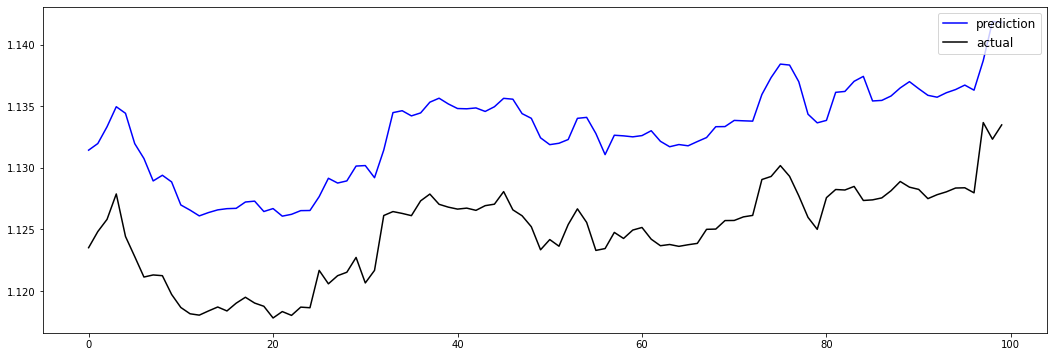

In [71]:
# plot
plt.figure(figsize=(18,6))
plt.plot([x for x in range(0,100)], prediction[:100], linestyle='-', color='blue', label='prediction')
plt.plot([x for x in range(0,100)], test_y[:100], linestyle='-', color='black', label='actual')
plt.legend(loc=1, prop={'size': 12})
plt.show()


In [66]:
target=[]
for i in range(len(result)):
    if result.iloc[i,5]<result.iloc[i,7]:
        target.append(1)
    else:
        target.append(0)
        

In [72]:
result['target']=target
result.head()


,Date,Time,Open,High,Low,Close,prdiction,target
103948,2015.10.05,09:00,1.12307,1.12434,1.12254,1.12352,1.131431,1
103949,2015.10.05,10:00,1.12352,1.12593,1.12213,1.12483,1.131970,1
103950,2015.10.05,11:00,1.12484,1.12645,1.12443,1.12582,1.133332,1
103951,2015.10.05,12:00,1.12582,1.12890,1.12577,1.12788,1.134954,1
103952,2015.10.05,13:00,1.12786,1.12804,1.12362,1.12443,1.134421,1


In [73]:
result['target'].value_counts()

1    25985
0        2
Name: target, dtype: int64

In [78]:
result.to_excel('result.xlsx')

In [62]:
!ls 'drive/My Drive/foxi_data'

ls: cannot access 'drive/My Drive/foxi_data': No such file or directory


In [95]:
test_data=pd.read_csv('drive/My Drive/foxi_data/DEUIDXEUR60.csv',sep='\t')

In [96]:
test_data.head()

,2012-01-19 16:00,6401.96,6416.91,6397.65,6416.26,791
0,2012-01-19 17:00,6416.26,6416.26,6416.26,6416.26,1
1,2012-01-19 18:00,6416.26,6416.26,6416.26,6416.26,1
2,2012-01-19 21:00,6416.26,6416.26,6416.26,6416.26,1
3,2012-01-19 23:00,6416.26,6416.26,6416.26,6416.26,1
4,2012-01-20 07:00,6416.26,6416.26,6416.26,6416.26,1


In [104]:
test_X=test_data.iloc[:,[1,2,3]].values
test_y=test_data.iloc[:,4].values

# Preprocessing


In [98]:
test_X.shape

(38610, 3)

In [99]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
test_X[:,:]=imputer.fit_transform(test_X[:,:])

In [100]:
test_X=featurescaling.transform(test_X)

In [101]:
test_X=test_X.reshape(test_X.shape[0],n_mins,n_features)


In [105]:
pred=model.predict(test_X)

ValueError: ignored

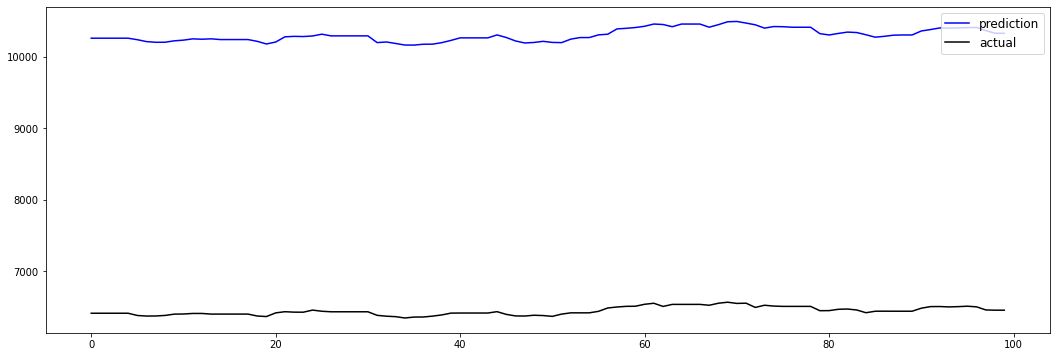

In [106]:
# plot
plt.figure(figsize=(18,6))
plt.plot([x for x in range(0,100)], pred[:100], linestyle='-', color='blue', label='prediction')
plt.plot([x for x in range(0,100)], test_y[:100], linestyle='-', color='black', label='actual')
plt.legend(loc=1, prop={'size': 12})
plt.show()
